In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from non_linear_equations import draw_function

In [8]:
def lagrange_polynomial(x, n):
    x_points = np.linspace(-1, 1, n)
#     print(f"n={n}: {x_points}")
    y_points = f(x_points)
    n = len(x_points)
    accumulate_sum = 0
    for k in range(0, n):
        accumulate_product = 1
        for j in range(0, k):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        for j in range(k + 1, n):
            accumulate_product *= (x - x_points[j]) / (x_points[k] - x_points[j])
        accumulate_sum += accumulate_product * y_points[k]
    return accumulate_sum

In [9]:
def f(x):
    return 1 / (1 + 25 * x ** 2)

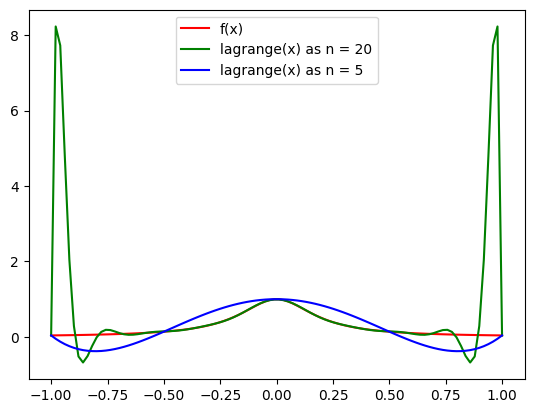

In [10]:
left = -1
right = 1
x = np.linspace(left, right, 100)
y = f(x)
lagrange_y_20 = lagrange_polynomial(x, 20)
lagrange_y_5 = lagrange_polynomial(x, 5)
plt.plot(x, y, color='r', label="f(x)")
plt.plot(x, lagrange_y_20, color='g', label="lagrange(x) as n = 20")
plt.plot(x, lagrange_y_5, color='b', label="lagrange(x) as n = 5")
plt.legend()
plt.show()

# print(f(-1))
# print(lagrange_polynomial(-1, 5))
# print(lagrange_polynomial(-1, 20))

In [34]:
def thomas_algorithm(a, b, c, f, k1, k2, v1, v2, n):
    alphas = [k1]
    betas = [v1]
    for i in range(n):
        temp = (c[i]-alphas[i]*a[i])
        alpha = b[i]/temp
        beta = (a[i]*betas[i]+f[i])/temp
        alphas.append(alpha)
        betas.append(beta)
    result = [0 for i in range(n)]
    y_n = (v2 + k2 * betas[-1])/(1-alphas[-1]*k2)
    result[n-1] = y_n 
    for i in range(n-2, -1, -1):
        y = (alphas[i+1]*result[i+1]+betas[i+1])
        result[i] = y
    result
    return np.array([result])

In [35]:
def spline(x, y):
    n = len(y) - 1
    a = [0.0 for _ in range(n)]
    b = [0.0 for _ in range(n)]
    c = [0.0 for _ in range(n)]
    f = [0.0 for _ in range(n)]
    for i in range(n):
        a[i] = x[i-1] - x[i-2] # h[i-1]
        b[i] = x[i] - x[i-1] # h[i]
        c[i] = -2 * (b[i] + a[i])
        f[i] = -3 * ((y[i] - y[i-1]) / b[i] - (y[i-1] - y[i-2])/a[i])
    c_coef = thomas_algorithm(a, b, c, f, 0, 0, 0, 0, n)
    
    b_coef = np.zeros((1, n))
    for i in range(n-1):
        b_coef[0][i] = (y[i] - y[i-1])/b[i] - (1/3) * b[i]*(c[i+1] + 2 * c[i])
    b_coef[-1] = (y[-1] - y[-2])/b[-1] - (2/3) * b[-1] * c_coef[0][-1]
    
    d_coef = np.zeros((1, n))
    for i in range(n-1):
        d_coef[0][i] = (c_coef[i+1]-c_coef[i])/(3*b[i])
    d_coef[-1] = -c_coef[-1]/(3 * b[i])
    a_coef = np.array([y[:-1]])
    return (a_coef, b_coef,c_coef,d_coef)

In [36]:
x = np.linspace(-1, 1, 5)
y = f(x)
a,b,c,d = spline(x, y)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [26]:
x

array([-10.,  -5.,   0.,   5.,  10.])

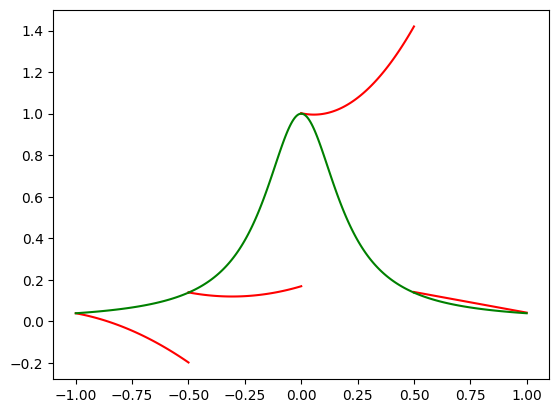

In [32]:
for i in range(1, n):
    left = x[i-1]
    right = x[i]
    inner_segment = np.linspace(left, right, 100)
    inter_func = lambda x: a[0][i-1] + b[0][i-1] * (x - x[i-1]) + c[0][i-1] * (x - x[i -1]) ** 2 + d[0][i-1] * (x - x[i -1]) ** 3
    plt.plot(inner_segment, inter_func(inner_segment), color='r', label="interpolated f(x)")
    plt.plot(inner_segment, f(inner_segment), color='g', label="f(x)")
# plt.legend()
plt.show()

In [33]:
a

array([[0.03846154, 0.13793103, 1.        , 0.13793103]])

In [92]:
for i in range(1, 5):
    print(x[i-1], x[i])

-1.0 -0.5
-0.5 0.0
0.0 0.5
0.5 1.0
